<a href="https://colab.research.google.com/github/dimasw09/BelajarKoding/blob/main/PrediksiKelulusan3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


dataset_url = ('https://raw.githubusercontent.com/dimasw09/BelajarKoding/main/Dataset1.csv')

d = pd.read_csv(dataset_url)
d.head(170)

,Tahun Masuk,IPK,SKS,Status Kelulusan
0,2015,4,103,1
1,2015,3,103,1
2,2015,3,98,0
3,2015,3,101,1
4,2015,3,101,0
...,...,...,...,...
165,2016,3,8,1
166,2016,3,72,1
167,2016,3,112,1
168,2017,3,84,1


In [2]:
d.columns

Index(['Tahun Masuk', 'IPK', 'SKS', 'Status Kelulusan'], dtype='object')

In [3]:
x=d.iloc[:,0:-1]
y=d.iloc[:,2].values
print(x.shape)

(170, 3)


In [4]:
#Import Module
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(x, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=122)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
test_X = sc.fit_transform(test_X)
test_y = sc.fit_transform(test_y.reshape(-1,1))
print(test_X)
print(test_y)

[[-0.19127301 -0.53250075 -0.23230625]
 [-0.19127301 -0.53250075 -0.18434019]
 [-0.19127301  1.55654065  0.00752409]
 [ 3.06036822 -0.53250075  0.43921871]
 [-0.19127301 -0.53250075  0.72701512]
 [-0.19127301 -0.53250075 -0.66400087]
 [-0.19127301 -0.53250075  0.63108298]
 [-0.19127301  1.55654065  0.91887939]
 [-0.19127301  1.55654065 -0.4721366 ]
 [-0.19127301  1.55654065 -0.4721366 ]
 [-0.19127301 -0.53250075  0.82294726]
 [-0.19127301 -0.53250075 -0.66400087]
 [-0.19127301 -0.53250075 -0.75993301]
 [-0.19127301 -0.53250075  0.67904905]
 [-0.19127301  1.55654065 -0.66400087]
 [-0.19127301 -0.53250075 -4.06959174]
 [-0.19127301 -0.53250075  0.72701512]
 [-0.19127301 -0.53250075 -0.66400087]
 [-0.19127301 -0.53250075  0.63108298]
 [-0.19127301 -0.53250075  0.67904905]
 [-0.19127301 -0.53250075 -0.04044198]
 [-0.19127301 -0.53250075 -0.75993301]
 [-0.19127301 -2.62154215  0.48718478]
 [-0.19127301 -0.53250075  0.67904905]
 [-0.19127301 -0.53250075 -2.05501686]
 [-0.19127301  1.55654065

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=5,activation='relu'))
model.add(tf.keras.layers.Dense(units=4,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(test_X,test_y.reshape(-1,1),epochs=10,batch_size=30)

model.summary()

Epoch 1/10
2/2 [==============================] - 0s 6ms/step - loss: 0.7875
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 0.7866
Epoch 3/10
2/2 [==============================] - 0s 5ms/step - loss: 0.7859
Epoch 4/10
2/2 [==============================] - 0s 14ms/step - loss: 0.7852
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 0.7845
Epoch 6/10
2/2 [==============================] - 0s 4ms/step - loss: 0.7838
Epoch 7/10
2/2 [==============================] - 0s 3ms/step - loss: 0.7831
Epoch 8/10
2/2 [==============================] - 0s 4ms/step - loss: 0.7825
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 0.7818
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 0.7811
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 20        
        

In [14]:
ypredict=model.predict(test_X)
print(ypredict)

2/2 [==============================] - 0s 5ms/step
[[0.4935132 ]
 [0.4933485 ]
 [0.48307985]
 [0.4866772 ]
 [0.4895415 ]
 [0.49499574]
 [0.49001276]
 [0.46088335]
 [0.4907505 ]
 [0.4907505 ]
 [0.48907024]
 [0.49499574]
 [0.49658823]
 [0.48977715]
 [0.4925157 ]
 [0.52108645]
 [0.4895415 ]
 [0.49499574]
 [0.49001276]
 [0.48977715]
 [0.49314237]
 [0.49658823]
 [0.46492335]
 [0.48977715]
 [0.5076944 ]
 [0.46413836]
 [0.46413836]
 [0.48813486]
 [0.49024847]
 [0.46088335]
 [0.46235526]
 [0.49658823]
 [0.49001276]
 [0.42684296]
 [0.49658823]
 [0.46086916]
 [0.46287864]
 [0.49466628]
 [0.48883462]
 [0.46088335]
 [0.4943368 ]
 [0.49658823]
 [0.46235526]
 [0.49001276]
 [0.49499574]
 [0.49658823]
 [0.48930588]
 [0.49466628]
 [0.51056576]
 [0.48977715]
 [0.4666591 ]]


In [15]:
from sklearn.metrics import mean_absolute_error
accuracy=mean_absolute_error(ypredict,test_y)
print(accuracy)

0.7806595697509942


<Figure size 432x288 with 0 Axes>

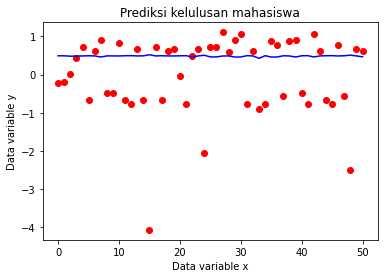

<Figure size 432x288 with 0 Axes>

In [17]:
a=range(len(test_X))
plt.scatter(a,test_y, color='red')
plt.plot(a,ypredict, color='blue')
plt.title('Prediksi kelulusan mahasiswa')
plt.xlabel('Data variable x')
plt.ylabel('Data variable y')
# plt.plot(x,ypredict)
plt.figure()